# NoisET example: Null model learning  

<p>
In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its first function (ie learning experimental noise model from replicate samples). The output is a <strong>list </strong> of five, four or 2 <strong> parameters </strong> regarding the chosen noise model (respectively Negative Binomial + Poisson, Negative Binomial or Poisson). Details about the distributions and the meaning of each parameters are detailed in methods section of READme document. </p>


 In 1/ we are training the noise statistical model on <strong> mRNA </strong> data published in 2019 [Precise tracking of vaccine-responding T cell clones reveals convergent and personalized response in identical twins, Pogorelyy et al, PNAS](https://www.pnas.org/content/115/50/12704) with Negative Binomial model (noise_model=1 in the package) and generate synthetic data with <strong> <em> NoisET </em> </strong>thanks to the former learning step for qualitative check. 


In 2/ we are testing the noise statistical model on <strong> gDNA </strong> data published in 2019 [Model to improve specificity for identification of clinically-relevant expanded T cells in peripheral blood, Rytlewski et al, PLOS ONE](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0213684) with Poisson (noise_model=2 in the package) and generate synthetic data with <strong> <em> NoisET </em> </strong> thanks to the former learning step for qualitative check. 

In the article linked to this github, results using noise_model = 0 (Negative Binomial + Poisson) are displayed.
 

In [1]:
import numpy as np
import noisets
import sys
sys.path.append('../NoisET/noisets')
import noisettes as ns

import matplotlib.pyplot as plt

# 1/ Noise Model with mRNA data ($Q_1$ [Pogorelyy et al, PNAS] ) Negative Binomial Noise Model

### A/ Import data 

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the null-model learning. So on, "time_1" and "time_2" will be exactlyt the same. For the case of the null-model learning,the two time points refer to two different biological samples.

In [2]:
# Load data 
path = 'data_examples/'
filename1 = 'Q1_0_F1_.txt.gz' # first biological replicate
filename2 = 'Q1_0_F2_.txt.gz' # second biological replicate
col_names = ['Clone count', 'Clone count']
id_names = ['N. Seq. CDR3', 'N. Seq. CDR3']

# check 
cl_Q1 = ns.Data_Process(path, filename1, filename2, id_names, col_names)
print("First Filename is : " , cl_Q1.filename1)
print("Second Filename is : ",  cl_Q1.filename2)

# Import the data
df = cl_Q1.import_data()
fractions1, fractions2 = df['counts1']/df['counts1'].sum(), df['counts2']/df['counts2'].sum()

First Filename is :  Q1_0_F1_.txt.gz
Second Filename is :  Q1_0_F2_.txt.gz


- Visualization of the data

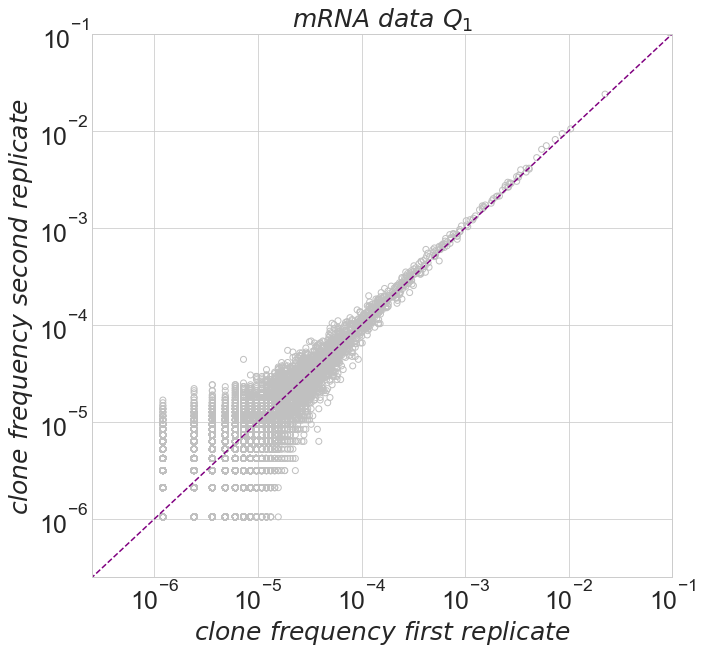

In [3]:
plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ mRNA \ data \ Q_1 $', fontsize = 25)
plt.scatter(fractions1, fractions2, c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')

### B/ Null-model learning

In [3]:
noise_model = 1 # Negative Binomial 
#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson

# Suggested parameters
init_paras_arr = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]),
                   np.asarray([-2.02192528,   0.45220384,   1.06806274, -10.18866972]),
                   np.asarray([-2.15206189,  -9.46699067]) ]
init_paras = init_paras_arr[noise_model]

In [4]:
null_model = ns.Noise_Model(df) 
null_model.learn_null_model(noise_model, init_paras)

Iter      alph_rho  beta      alpha     fmin      


../NoisET/noisets/utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
../NoisET/noisets/utils.py:113: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
../NoisET/noisets/utils.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)
../NoisET/noisets/noisettes.py:316: RuntimeWarning: divide by zero encountered in log
  integ = np.exp(np.log(integ) + logfvec[:, np.newaxis])


1 -2.080381 0.450565 1.081707 -10.196348 
1.5048583178704584
2 -2.050728 0.445072 1.091822 -10.192596 
1.5043143362544171
3 -2.055021 0.444421 1.092494 -10.197284 
1.504281142033112
4 -2.054950 0.442766 1.094422 -10.199928 
1.504277432841089
5 -2.054563 0.442412 1.093992 -10.199182 
1.504276596547222
6 -2.054540 0.441526 1.093583 -10.199138 
1.5042759988197143
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.5042759988197143
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 6


(     fun: 1.5042759988197143
      jac: array([-0.00039357,  0.00010455,  0.00119859,  0.00061081])
  message: 'Optimization terminated successfully.'
     nfev: 37
      nit: 6
     njev: 6
   status: 0
  success: True
        x: array([ -2.05454021,   0.44152588,   1.09358334, -10.19913821]),
 -5.815208628297714e-08)

In [7]:
print("Found parameters:" )
for i in range(len(null_model.params['value'])):
    print(null_model.params['label'][i], null_model.params['value'][i])

Found parameters:
alph_rho -2.054540213302929
beta 0.44152588073024845
alpha 1.0935833437559475
fmin -10.199138206678146


### C/ Generate synthetic data with NoisET

Create a Generator object and use the method gen_synthetic_data_Null

In [4]:
cl_Q1_gen = ns.Generator()
paras = [ -2.05458585,   0.44229634,   1.09391748, -10.19919861] #parameters learnt in the previous cell 
noise_model = 1 # Negative Binomial Noise model
NreadsI = np.sum(df['counts1']) # Total number of reads in the first sample
NreadsII = np.sum(df['counts2']) # Total number of reads in the second sample
Nsamp = len(df) # total number of clones found in both samples

f_samples, pair_samples = cl_Q1_gen.gen_synthetic_data_Null(paras, noise_model, NreadsI, NreadsII, Nsamp)

../NoisET/noisets/noisettes.py:854: RuntimeWarning: divide by zero encountered in log
  logPn0_f=np.log(Pn0_f)


Model probs: 0.440692456318963 0.5084962674667359 0.050811276214301024
q samples: 776247 341601 395049 39597
q sampled probs: 0.44006740122667143 0.5089217736107192 0.051010825162609325


../NoisET/noisets/noisettes.py:918: RuntimeWarning: divide by zero encountered in log
  integ=np.exp(np.log(Pf_qx0)+logfvec)
../NoisET/noisets/noisettes.py:961: RuntimeWarning: divide by zero encountered in log
  integ=np.exp(np.log(Pf_q0x)+logfvec)


Text(0.5,1,'$ Synthetic \\ data \\ generated \\ with \\ NoisET $')

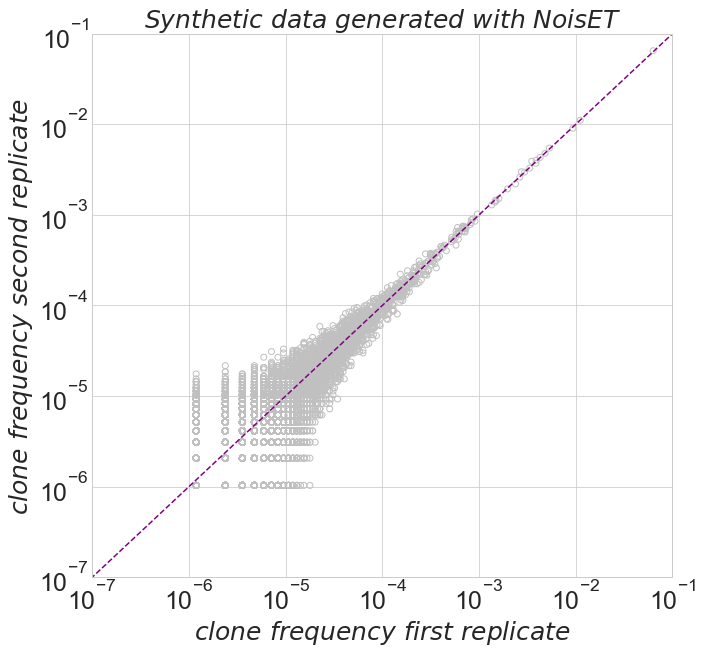

In [6]:
plt.figure(figsize=(10.4,10))

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(pair_samples['Clone_fraction_1'], pair_samples['Clone_fraction_2'], c='none', edgecolor='silver')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-7, 1e-1, 1e-7, 1e-1])

plt.title(r'$ Synthetic \ data \ generated \ with \ NoisET $', fontsize = 25)

# 2/ Noise Model with gDNA data ( [Rytlewski et al, PLOS ONE ] )  Poisson Noise Model

### A/ Import data 

In [8]:
path = 'data_examples/'
filename1 = 'replicate_1_1.tsv.gz' # first biological replicate
filename2 = 'replicate_1_2.tsv.gz' # second biological replicate
col_names = ['count', 'count']
id_names = ['nucleotide', 'nucleotide']

cl_Q1 = ns.Data_Process(path, filename1, filename2, id_names, col_names)
df_gDNA = cl_Q1.import_data()
fractions1, fractions2 = df['counts1']/df['counts1'].sum(), df['counts2']/df['counts2'].sum()

Text(0.5,1,'$ gDNA \\ data  $')

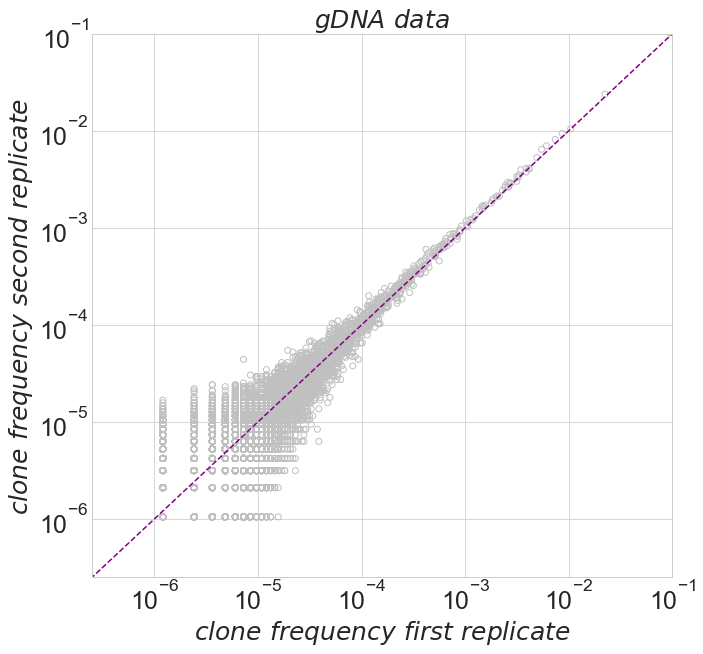

In [12]:
plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(fractions1, fractions2, c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ gDNA \ data  $', fontsize = 25)

### B/ Null-model learning

In [13]:
noise_model_gDNA = 2 # Poisson
#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson
init_paras_arr = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]), \
                    np.asarray([-2.02192528,   0.45220384,   1.06806274, -10.18866972]), \
                     np.asarray([-2.15206189,  -9.46699067])
                 ]
init_paras = init_paras_arr[noise_model_gDNA]

In [14]:
null_model = ns.Noise_Model(df_gDNA) 
null_model.learn_null_model(noise_model_gDNA, init_paras)

Iter      alph_rho  fmin      


../NoisET/noisets/utils.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)
../NoisET/noisets/noisettes.py:316: RuntimeWarning: divide by zero encountered in log
  integ = np.exp(np.log(integ) + logfvec[:, np.newaxis])


1 -2.011610 -9.439288 
1.31151770527829
2 -1.969743 -9.435799 
1.3133243678573776
3 -1.963507 -9.438970 
1.3139753475218352
4 -1.963340 -9.442433 
1.3139810212670078
5 -1.963267 -9.460826 
1.3139198136780734
6 -1.962745 -9.541908 
1.3136985394840084
7 -1.960470 -9.757783 
1.3133647744147088
8 -1.958429 -9.831724 
1.3133985140138993
9 -1.957283 -9.896837 
1.3133825903456444
10 -1.952216 -10.181528 
1.3134140651677517
11 -1.957150 -9.907084 
1.3133771099684204
12 -1.957067 -9.909109 
1.3133806751852812
13 -1.960579 -9.757361 
1.3133561686676858
14 -1.956850 -9.919805 
1.3133815586828173
15 -1.956850 -9.919805 
1.3133815586828173
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3133815586828173
            Iterations: 15
            Function evaluations: 83
            Gradient evaluations: 15


(     fun: 1.3133815586828173
      jac: array([0.07980612, 0.00158526])
  message: 'Optimization terminated successfully.'
     nfev: 83
      nit: 15
     njev: 15
   status: 0
  success: True
        x: array([-1.95684961, -9.91980468]), 2.0151853316174953e-08)

### C/ Generate synthetic data with NoisET

In [15]:
cl_rep_gen_gDNA = ns.Generator()
paras = [ -1.95623757, -9.95217108 ] #parameters learnt in the previous cell 
noise_model = 2 #Poisson Noise Model

NreadsI = np.sum(df_gDNA['counts1']) # Total number of reads in the first sample
NreadsII = np.sum(df_gDNA['counts2']) # Total number of reads in the second sample
Nsamp = len(df_gDNA) # total number of clones found in both samples

f_samples_gDNA, pair_samples_gDNA = cl_rep_gen_gDNA.gen_synthetic_data_Null(paras, noise_model, NreadsI, NreadsII, Nsamp)

Model probs: 0.4544183551662368 0.46035587502064296 0.0852257698131203
q samples: 280051 127627 128800 23624
q sampled probs: 0.45572770673912966 0.4599162295439045 0.08435606371696584


In [ ]:
plt.figure(figsize=(10.4,10))

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(pair_samples_gDNA['Clone_fraction_1'], pair_samples_gDNA['Clone_fraction_2'], c='none', edgecolor='silver')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-7, 1e-1, 1e-7, 1e-1])

plt.title(r'$ Synthetic \ data \ generated \ with \ NoisET $', fontsize = 25)